# Missing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# url = (
#     "http://biostat.mc.vanderbilt.edu/"
#     "wiki/pub/Main/DataSets/titanic3.xls"
# )
df = pd.read_excel("titanic3.xls")
orig_df = df
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

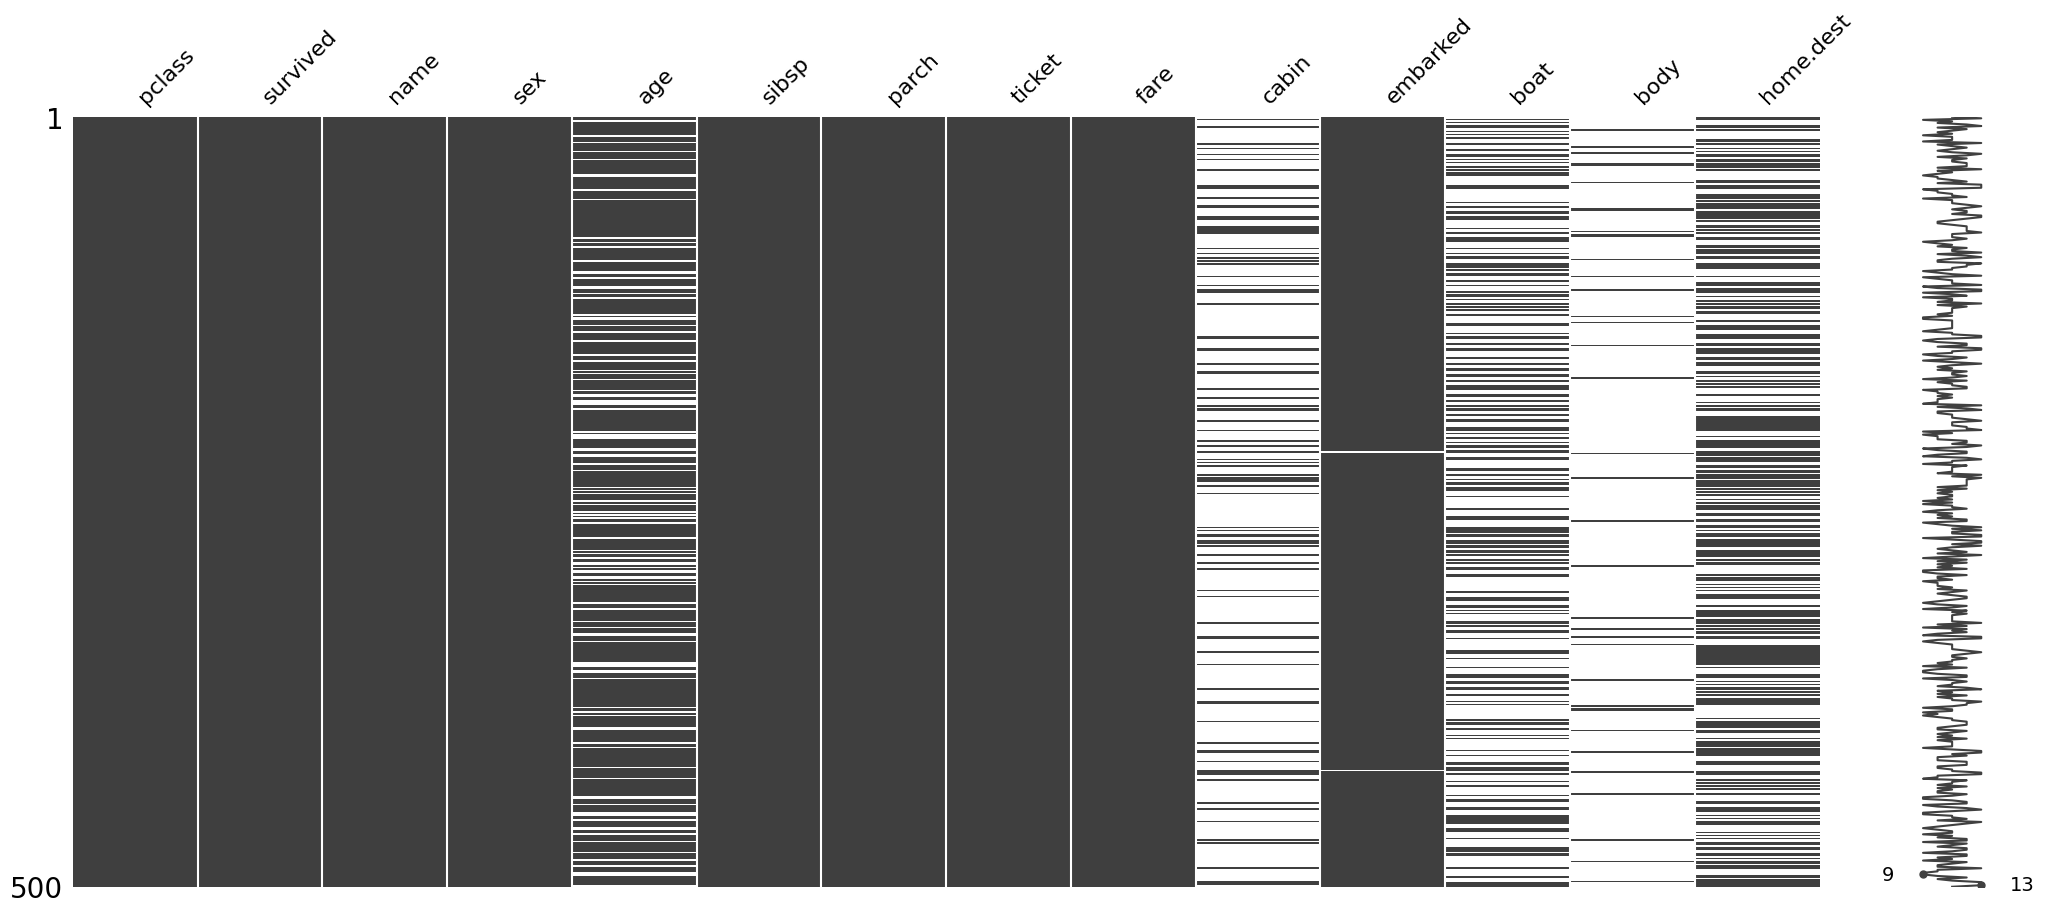

In [2]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))
#ax.get_figure().savefig("images/mlpr_0401.png")

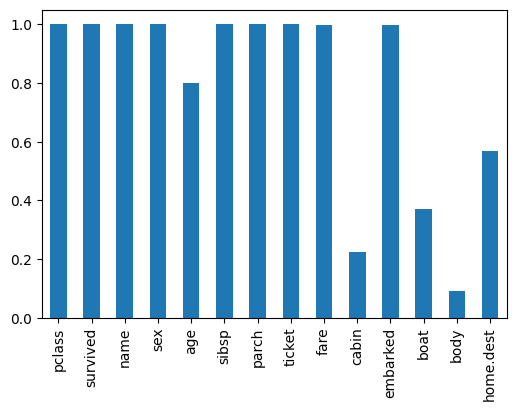

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax);

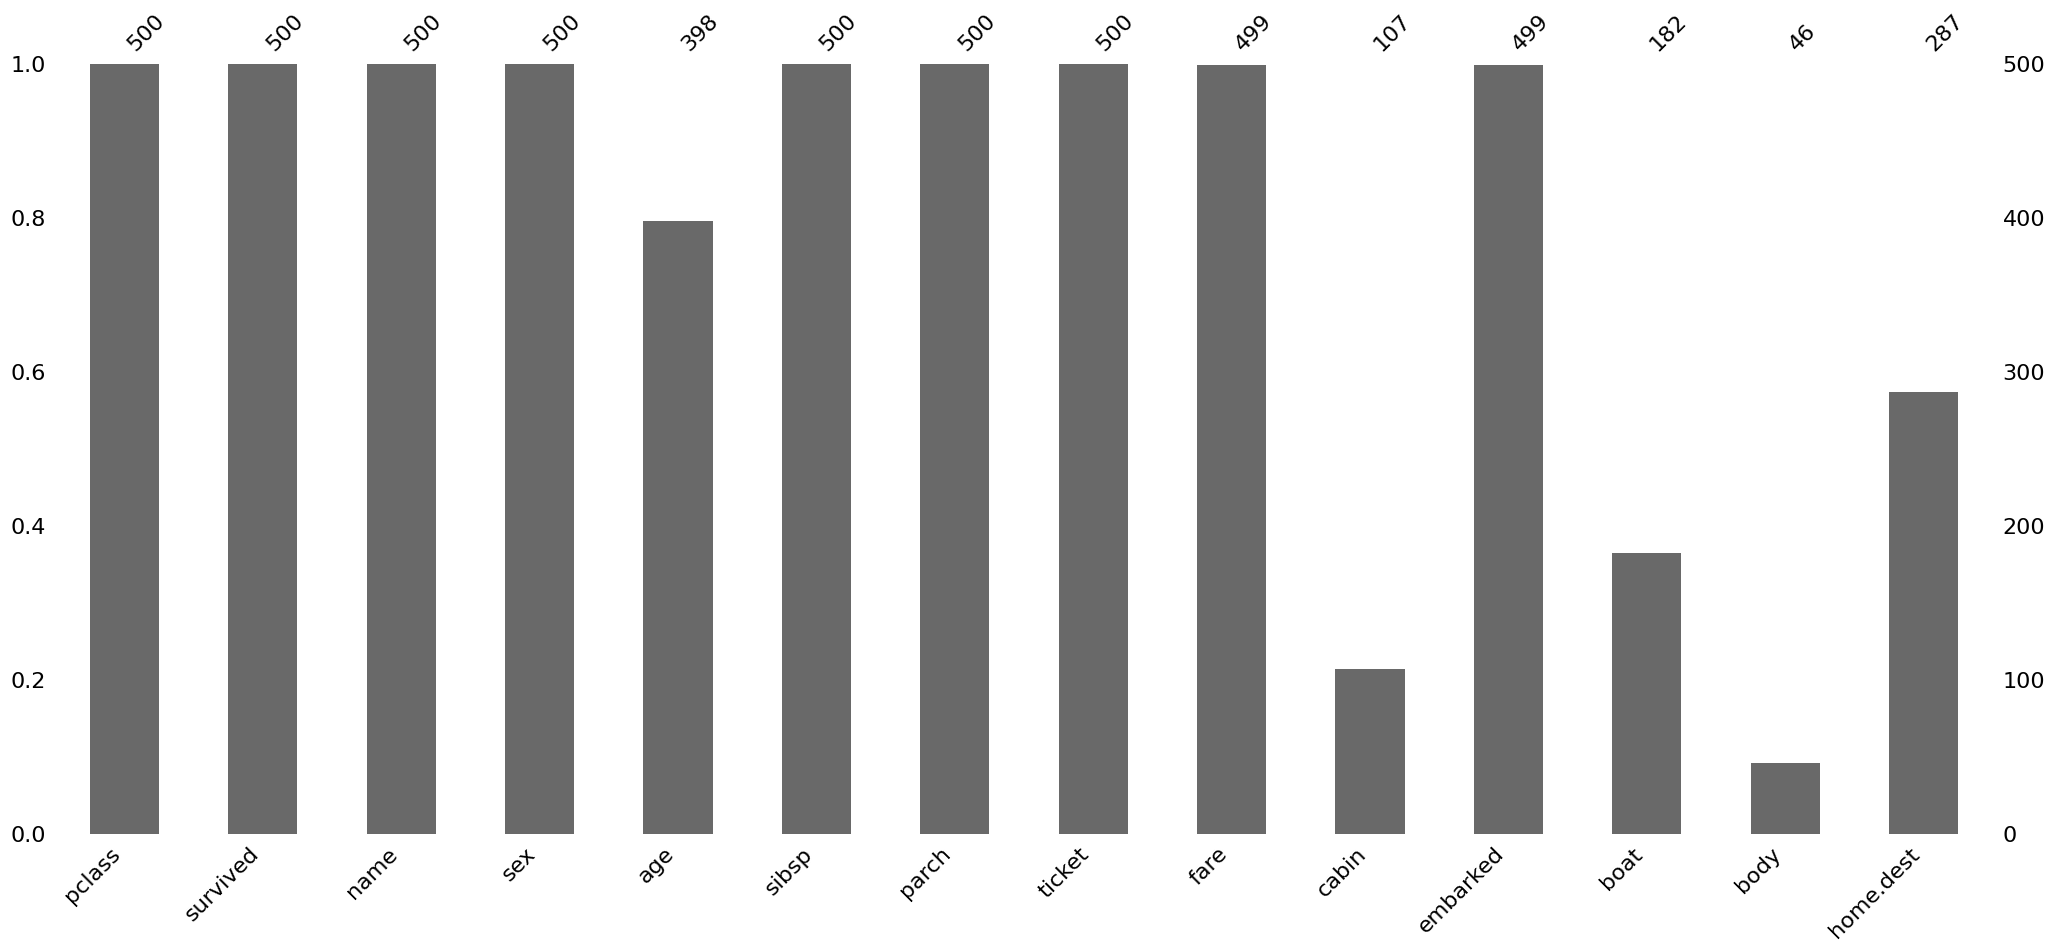

In [4]:
ax = msno.bar(orig_df.sample(500))

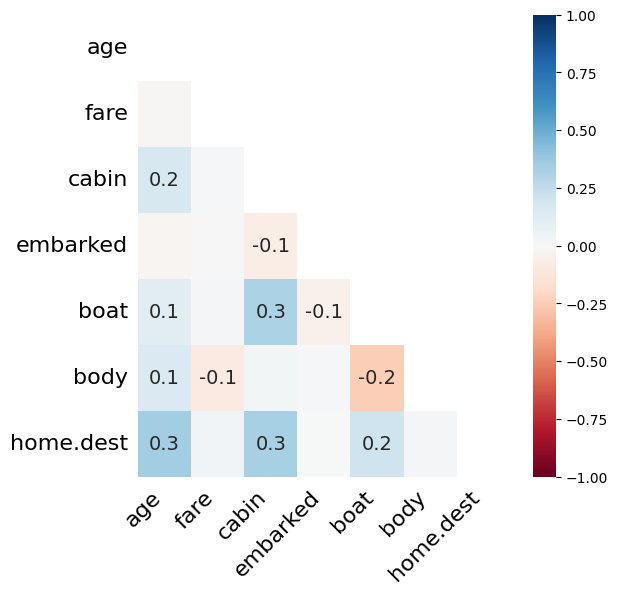

In [5]:
ax = msno.heatmap(df, figsize=(6, 6))

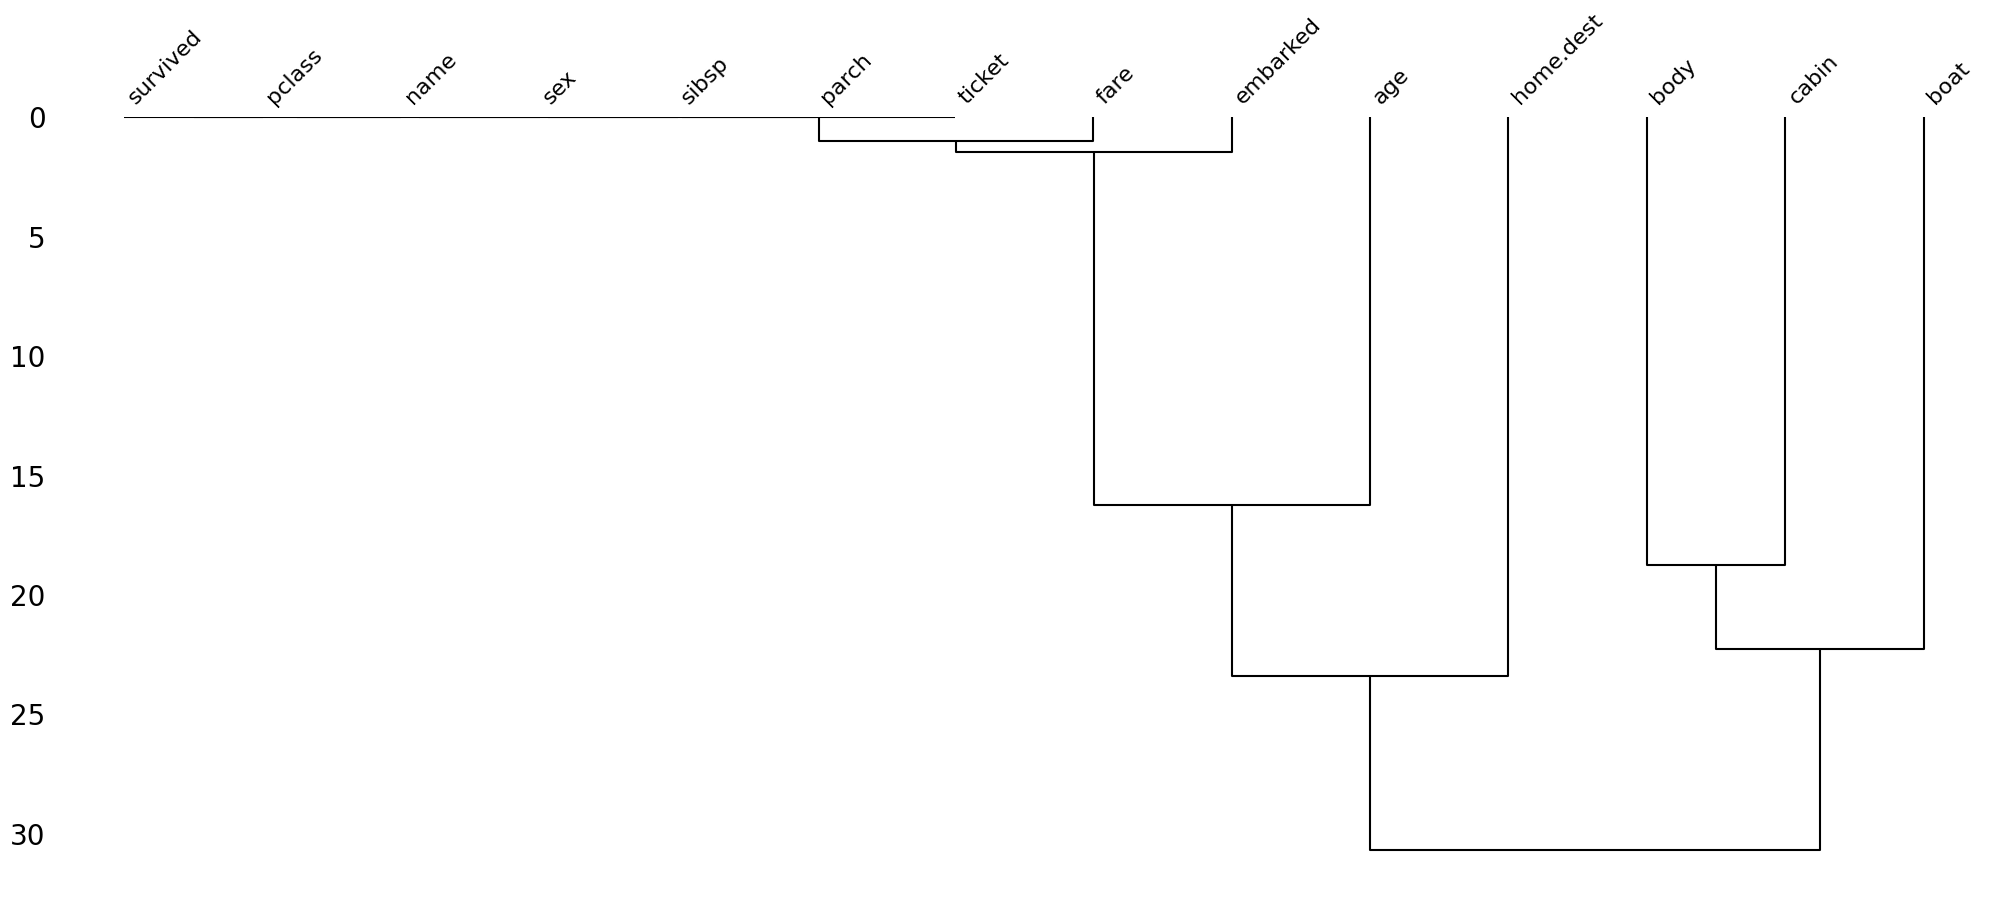

In [6]:
ax = msno.dendrogram(df)

In [7]:
df1 = df.dropna()

In [8]:
df1 = df.drop(columns="cabin")

In [9]:
df1 = df.dropna(axis=1)

In [10]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im = SimpleImputer()  # mean
imputed = im.fit_transform(df[num_cols])

In [11]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [12]:
df1 = df.assign(
    cabin_missing=add_indicator("cabin")
)